In [40]:
# Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# # Decision Tree for comparison
from sklearn.tree import DecisionTreeClassifier
# # Used for outputting images from a file
from IPython.display import display, Image

# # If any figures change, set to true
gen_new_plot=False

# Hyper Parameters: k and distance

In [41]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    pd.read_csv("features.csv"), pd.read_csv("target.csv"),
    random_state=0
)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

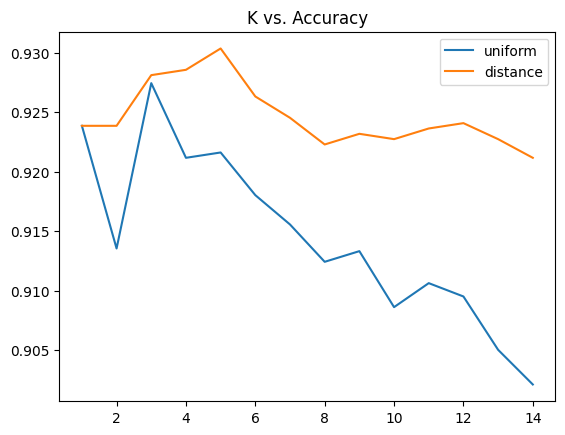

In [42]:
# gen_new_plot=True
# if (gen_new_plot):
#     # KNN without distance weighting
#     arr = np.array([])
#     y_test = y_test.squeeze()
#     for n in range(1,15):
#         knn = KNeighborsClassifier(n_neighbors=n, weights="uniform")
#         knn.fit(X_train_scaled, np.ravel(y_train))
#         y1_predict = knn.predict(X_test_scaled)
#         m = np.mean(y1_predict == y_test)
#         arr = np.append(arr, np.array(m))
#     plt.plot(range(1, arr.size+1), arr)
#     plt.title("K vs. Accuracy, no weights")
#     plt.show()
#     # KNN with distance weighting
#     arr = np.array([])
#     y_test = y_test.squeeze()
#     for n in range(1,15):
#         knn = KNeighborsClassifier(n_neighbors=n, weights="distance")
#         knn.fit(X_train_scaled, np.ravel(y_train))
#         y1_predict = knn.predict(X_test_scaled)
#         m = np.mean(y1_predict == y_test)
#         arr = np.append(arr, np.array(m))
#     plt.plot(range(1, arr.size+1), arr)
#     plt.title("K vs. Accuracy, weights=\"distance\"")
#     plt.legend([])
#     plt.show()
# else:
#     filename = ".CompiledKNN/K_vs._Accuracy.png"
#     display(Image(filename=filename))
#     filename = ".CompiledKNN/K vs. Accuracy - weighted.png"
#     display(Image(filename=filename))



gen_new_plot=False
if (gen_new_plot):
    # KNN without distance weighting
    arr = np.array([])
    y_test = y_test.squeeze()
    for n in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=n, weights="uniform")
        knn.fit(X_train_scaled, np.ravel(y_train))
        y1_predict = knn.predict(X_test_scaled)
        m = np.mean(y1_predict == y_test)
        arr = np.append(arr, np.array(m))
    # KNN with distance weighting
    arr2 = np.array([])
    for n in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=n, weights="distance")
        knn.fit(X_train_scaled, np.ravel(y_train))
        y1_predict = knn.predict(X_test_scaled)
        m = np.mean(y1_predict == y_test)
        arr2 = np.append(arr2, np.array(m))
    plt.plot(range(1, arr.size+1), arr)
    plt.plot(range(1, arr2.size+1), arr2)
    plt.legend(['uniform', 'distance'])
    plt.title("K vs. Accuracy")
    plt.show()
else:
    filename = ".CompiledKNN/K_vs._Accuracy.png"
    display(Image(filename=filename))

In [43]:
# No weights
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_predict_knn = knn.predict(X_test_scaled)
print("NOT WEIGHTED")
print("KNN Test accuracy: ", knn.score(X_test_scaled, y_test))
print("KNN training accuracy: ", knn.score(X_train_scaled, y_train))

NOT WEIGHTED
KNN Test accuracy:  0.9274356103023517
KNN training accuracy:  0.9584888756159474


### Assess Accuracy of decision tree for comparison

In [44]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaled, y_train)
y_predict_tree = tree.predict(X_test_scaled)
print("tree, test accuracy: ", tree.score(X_test_scaled, y_test))
print("tree, train accuracy: ", tree.score(X_train_scaled, y_train))

tree, test accuracy:  0.9269876819708847
tree, train accuracy:  1.0


In [45]:
#calc misclassified for knn
knn_misclassified_y = y_test[y_test != y_predict_knn]

names = pd.Series(knn_misclassified_y).unique()
sum = 0
knn_error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = knn_misclassified_y[knn_misclassified_y == name].shape[0]
    sum += errors
    knn_error_counts = np.append(knn_error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
print("Number of misclassified: ", sum, "\nAverage number of misclassifications: ", knn_error_counts.mean())

knn_error_percentage = 100 * knn_error_counts / name_counts

#calc misclassified for tree
tree_misclassified_y = y_test[y_test != y_predict_tree]

names = pd.Series(tree_misclassified_y).unique()
sum = 0
tree_error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = tree_misclassified_y[tree_misclassified_y == name].shape[0]
    sum += errors
    tree_error_counts = np.append(tree_error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, tree_misclassified_y.shape, sum)

tree_error_percentage = 100 * tree_error_counts / name_counts

Number of misclassified:  324 
Average number of misclassifications:  19.058823529411764


array([' Fiesta', ' C-MAX', ' KA', ' S-MAX', ' EcoSport', ' Kuga',
       ' Grand C-MAX', ' Tourneo Custom', ' Puma', ' Mondeo', ' Ka+',
       ' Galaxy', ' Focus', ' B-MAX', ' Edge', ' Grand Tourneo Connect'],
      dtype=object)

(326,)

326

In [46]:

# # Plot misclassifications
# plt.figure(figsize=(12, 4))
# plt.bar(range(knn_error_counts.size), height=knn_error_counts, align='edge', width=0.2)
# plt.bar(range(tree_error_counts.size), height=tree_error_counts, align='edge', width=0.2)
# plt.legend(["KNN","Tree"])
# plt.xticks(range(16), names, rotation=70)
# plt.yticks(range(0, 80, 5))
# plt.grid(axis='y')
# plt.title("Error counts per model")
# plt.show()


# plt.figure(figsize=(12, 4))
# plt.bar(range(knn_error_counts.size), height=knn_error_percentage, align='edge', width=0.2)
# plt.bar(range(tree_error_counts.size), height=tree_error_percentage, align='edge', width=0.2)
# plt.legend(["KNN","Tree"])
# plt.xticks(range(16), names, rotation=70)
# plt.yticks(range(0, 50, 5))
# plt.grid(axis='y')
# plt.title("Error percentage per model")
# plt.show()

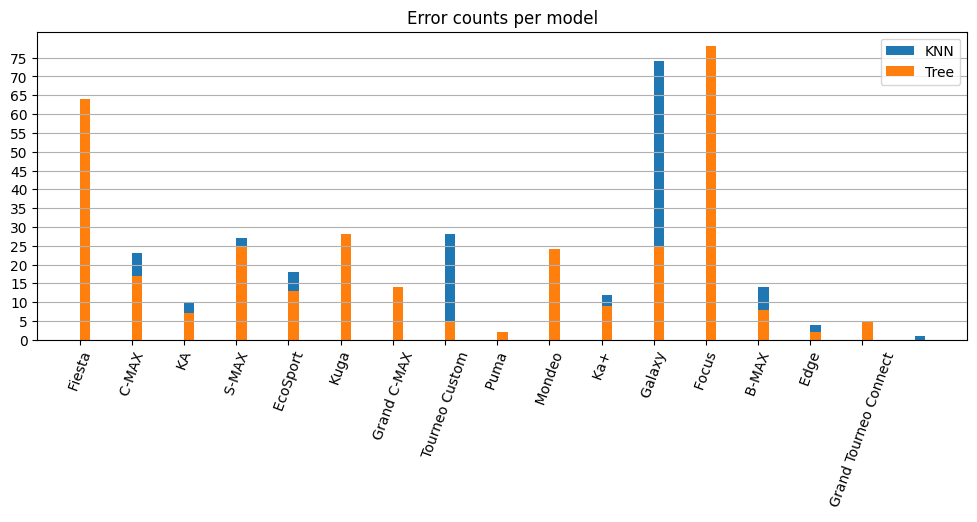

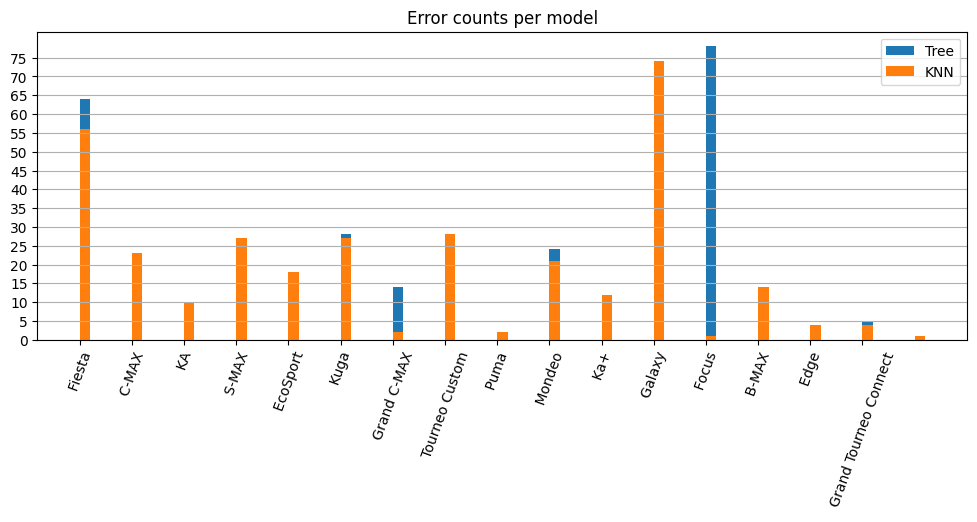

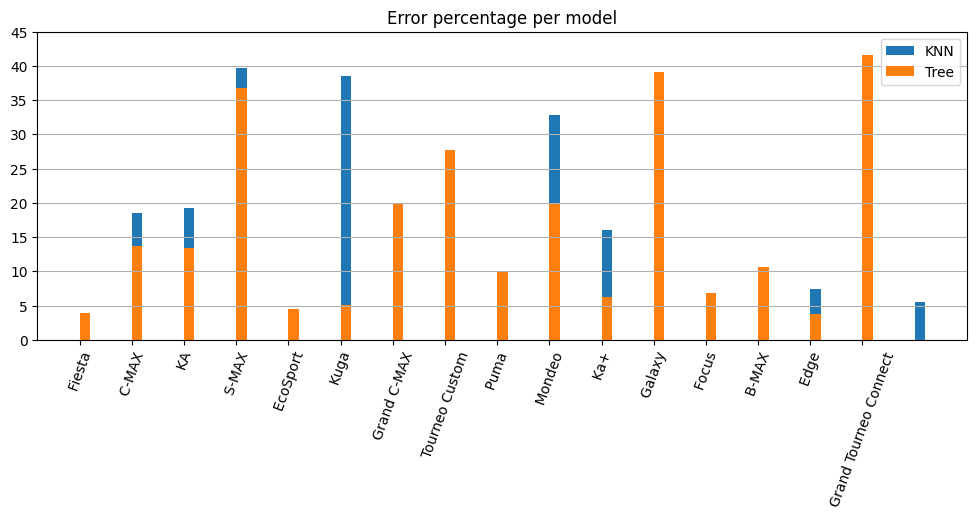

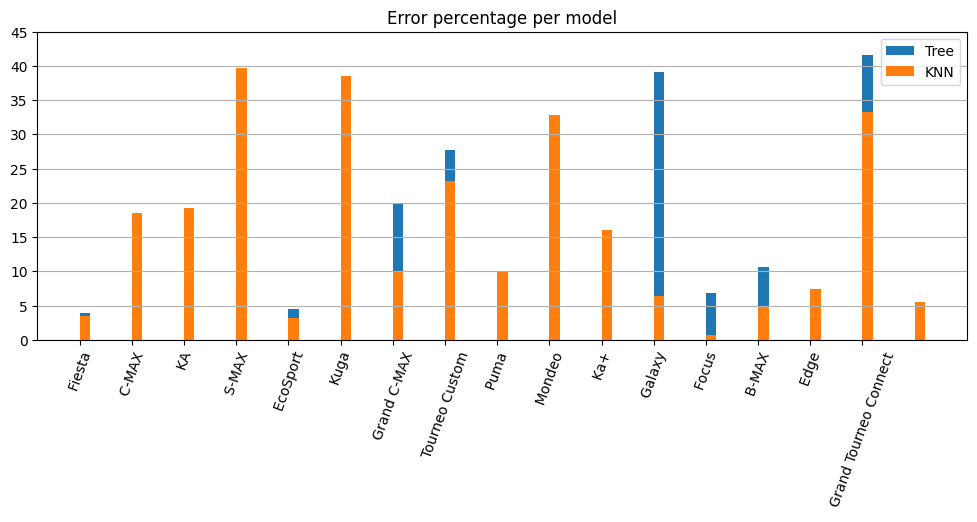

In [47]:
# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(knn_error_counts.size), height=knn_error_counts, align='edge', width=0.2)
plt.bar(range(tree_error_counts.size), height=tree_error_counts, align='edge', width=0.2)
plt.legend(["KNN","Tree"])
plt.xticks(range(16), names, rotation=70)
plt.yticks(range(0, 80, 5))
plt.grid(axis='y')
plt.title("Error counts per model")
plt.show()

# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(tree_error_counts.size), height=tree_error_counts, align='edge', width=0.2)
plt.bar(range(knn_error_counts.size), height=knn_error_counts, align='edge', width=0.2)
plt.legend(["Tree","KNN"])
plt.xticks(range(16), names, rotation=70)
plt.yticks(range(0, 80, 5))
plt.grid(axis='y')
plt.title("Error counts per model")
plt.show()


#########################################################################################################################




plt.figure(figsize=(12, 4))
plt.bar(range(knn_error_counts.size), height=knn_error_percentage, align='edge', width=0.2)
plt.bar(range(tree_error_counts.size), height=tree_error_percentage, align='edge', width=0.2)
plt.legend(["KNN","Tree"])
plt.xticks(range(16), names, rotation=70)
plt.yticks(range(0, 50, 5))
plt.grid(axis='y')
plt.title("Error percentage per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(tree_error_counts.size), height=tree_error_percentage, align='edge', width=0.2)
plt.bar(range(knn_error_counts.size), height=knn_error_percentage, align='edge', width=0.2)
plt.legend(["Tree","KNN"])
plt.xticks(range(16), names, rotation=70)
plt.yticks(range(0, 50, 5))
plt.grid(axis='y')
plt.title("Error percentage per model")
plt.show()

# Section 5: Cross Validation

Evaluate the accuracy of a 10-fold cross validation for the KNN model.

In [48]:
# target = target.to_numpy().ravel()

In [49]:
# knn: KNeighborsClassifier = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=10)


In [50]:
cv_knn.mean()

0.9213822968800509

In [51]:
# tree: DecisionTreeClassifier = DecisionTreeClassifier(
#     random_state=0
# )

cv_tree = cross_val_score(tree, X_train_scaled, y_train, cv=10)
cv_tree.mean()

0.9239203905788458

---

# Feature Importances

In [52]:
display(tree.feature_importances_)
display(tree.feature_names_in_)

array([0.05817145, 0.12678898, 0.05619194, 0.1961206 , 0.00259822,
       0.04724242, 0.00134229, 0.00176652, 0.        , 0.00050045,
       0.02066149, 0.48861562])

array(['year scaled', 'price scaled', 'mileage scaled',
       'engineSize scaled', 'Automatic scaled', 'Manual scaled',
       'Semi-Auto scaled', 'Diesel scaled', 'Electric scaled',
       'Hybrid scaled', 'Petrol scaled', 'mpg scaled * 7.0'], dtype=object)